In [10]:
# %%
import os  

import numpy as np
import pandas as pd



from icecream import ic


from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_squared_error,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import scipy.io
import matplotlib.pyplot as plt

from tensorly.decomposition import parafac
import tensorly as tl


from TKL import TKL
from KL import KL

from utils import *


# load data
args_dataPathList = fr'D:\Code-git\DeepKernelLearning/data/AD_CN/GM.csv,D:\Code-git\DeepKernelLearning/data/AD_CN/PET.csv,D:\Code-git\DeepKernelLearning/data/AD_CN/CSF.csv,D:\Code-git\DeepKernelLearning/data/AD_CN/SNP.csv'
dataPathList = [str(item) for item in args_dataPathList.split(',')]
X_list = []
for dataPath in dataPathList:
  X = pd.read_csv(dataPath,header=None).values
  X_list.append(X)

df_y = pd.read_csv(fr'D:\Code-git\DeepKernelLearning/data/AD_CN/AD_CN_label.csv')    
y = df_y['encoded']
le = LabelEncoder()
y = le.fit_transform(y)

#split data   
exp = 8
Z = range(len(y)) 
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=exp)

In [11]:
for modality in range(4):
  X_train = X_list[modality][Z_train,:]
  X_test = X_list[modality][Z_test,:]

  clf = KL()
  clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)
  cf  = confusion_matrix(y_pred, y_test)
  acc = round(np.sum(np.diag(cf))/ np.sum(cf)*100,2)
  ic(f"Modality: {modality}",cf, acc)

ic| f"Modality: {modality}": 'Modality: 0'
    cf: array([[22,  5],
               [ 3, 17]], dtype=int64)
    acc: 82.98
ic| f"Modality: {modality}": 'Modality: 1'
    cf: array([[24,  4],
               [ 1, 18]], dtype=int64)
    acc: 89.36
ic| f"Modality: {modality}": 'Modality: 2'
    cf: array([[22,  6],
               [ 3, 16]], dtype=int64)
    acc: 80.85
ic| f"Modality: {modality}": 'Modality: 3'
    cf: array([[16, 13],
               [ 9,  9]], dtype=int64)
    acc: 53.19


ic| "TKL": 'TKL'
    acc: 93.62
    cf: array([[24,  2],
               [ 1, 20]], dtype=int64)


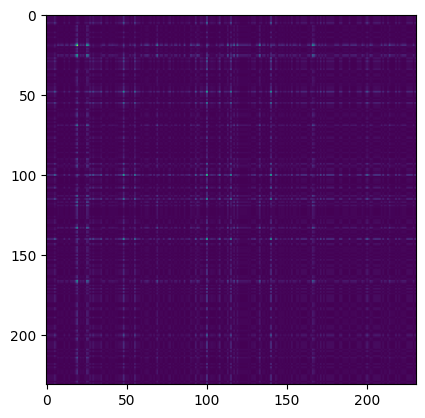

In [15]:
X_train_list = [x[Z_train,:] for x in X_list]
X_test_list = [x[Z_test,:] for x in X_list] 
clf = TKL(iterations=3,n_tree=500, kNN=5)
clf.fit(X_train_list,y_train)

y_pred = clf.predict(X_test_list)
cf  = confusion_matrix(y_pred, y_test)
acc = round(np.sum(np.diag(cf))/ np.sum(cf)*100,2)
ic("TKL",acc, cf)

plt.figure()
plt.imshow(clf.K)


ic| "Summatuion": 'Summatuion'
    acc: 91.49
    cf: array([[24,  3],
               [ 1, 19]], dtype=int64)


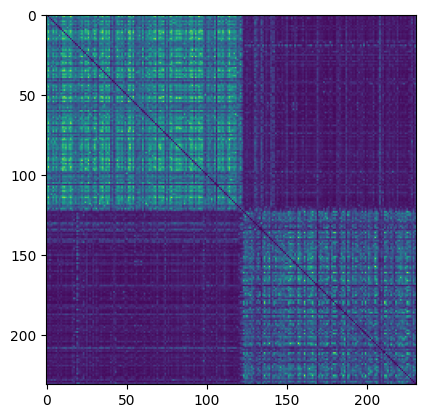

In [16]:
from kernelSummation import KernelSummation
clf = KernelSummation(n_tree=500)
clf.fit(X_train_list,y_train)
y_pred = clf.predict(X_test_list)
cf  = confusion_matrix(y_pred, y_test)
acc = round(np.sum(np.diag(cf))/ np.sum(cf)*100,2)
ic("Summatuion",acc, cf);
plt.figure()
plt.imshow(clf.K)

